#### GradientTree Boosting Classifier

In [6]:
##Import Required Libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import time

In [7]:
## Importing Iris Data Set
Full_data= load_iris()
#print(Full_data)

## Seperating data and target values from dataset
Main_data = Full_data['data']
#print(len(Main_data))
Class = Full_data['target']

## Converting to dataframes and assigning column names
data_df= pd.DataFrame(Main_data, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
class_df=pd.DataFrame(Class, columns=['Class'])

##Replacing Class values with actual category
setosa_df = class_df.replace(to_replace=[0], value='Setosa', regex=True)
versicolor_df = setosa_df.replace(to_replace=[1], value='versicolor', regex=True)
class_name_df = versicolor_df.replace(to_replace=[2], value='virginica', regex=True)
#print(class_name_df)



In [8]:
##Combining data Dataframe with class dataframe 
F1_df = pd.concat([data_df.reset_index(drop=True), class_df.reset_index(drop=True)], axis=1)        #Without class names
print(F1_df)
print('-------------------------------------------------------------------------------------')
F2_df = pd.concat([data_df.reset_index(drop=True), class_name_df.reset_index(drop=True)], axis=1)     #With class names
print(F2_df)

##Using iloc
data_df= F1_df.iloc[:, :-1].values
class_df = F1_df.iloc[:, 4].values

     sepal length  sepal width  petal length  petal width  Class
0             5.1          3.5           1.4          0.2      0
1             4.9          3.0           1.4          0.2      0
2             4.7          3.2           1.3          0.2      0
3             4.6          3.1           1.5          0.2      0
4             5.0          3.6           1.4          0.2      0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      2
146           6.3          2.5           5.0          1.9      2
147           6.5          3.0           5.2          2.0      2
148           6.2          3.4           5.4          2.3      2
149           5.9          3.0           5.1          1.8      2

[150 rows x 5 columns]
-------------------------------------------------------------------------------------
     sepal length  sepal width  petal length  petal width      Class
0             5.1          3.5           

In [9]:
## Divide the data int train nand test data
full_train_data, full_test_data, full_train_class, full_test_class = train_test_split(data_df, class_df, test_size=0.2, random_state=42)

In [10]:
##Gradient Boosting Classifier Implementation

est= [5, 10, 50, 150, 200]     #Number of Estimators
Acc_list=[]                    #Accuracy List
start = time.time()            #Timer
for i in range(len(est)):
    GBC = GradientBoostingClassifier(n_estimators=est[i], random_state=42)      #Taking max_depth =3 (Default), as asked in question
    Values = cross_val_score(GBC, full_train_data, full_train_class, cv=10)
    Accuracy = Values.mean()*100
    end = (time.time() - start)
    print('For %d Estimators' %est[i])
    print('Classifier Accuracy is:', Accuracy, '%')
    print('Time: ', end)
    print('---------------------------------------------------------------------------------------------------')
    Acc_list.append(Accuracy)

print('Accuracy list is:\n', Acc_list)

For 5 Estimators
Classifier Accuracy is: 93.33333333333333 %
Time:  0.0828099250793457
---------------------------------------------------------------------------------------------------
For 10 Estimators
Classifier Accuracy is: 93.33333333333333 %
Time:  0.2323780059814453
---------------------------------------------------------------------------------------------------
For 50 Estimators
Classifier Accuracy is: 92.49999999999999 %
Time:  0.9544479846954346
---------------------------------------------------------------------------------------------------
For 150 Estimators
Classifier Accuracy is: 92.49999999999999 %
Time:  2.86034893989563
---------------------------------------------------------------------------------------------------
For 200 Estimators
Classifier Accuracy is: 92.49999999999999 %
Time:  5.149256706237793
---------------------------------------------------------------------------------------------------
Accuracy list is:
 [93.33333333333333, 93.33333333333333, 92.4

   Estimator   Accuracy
0          5  93.333333
1         10  93.333333
2         50  92.500000
3        150  92.500000
4        200  92.500000


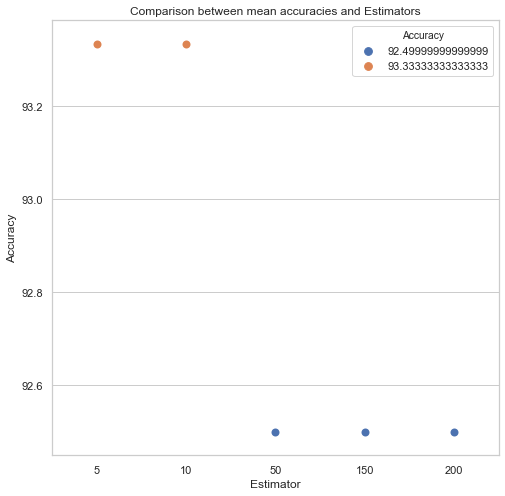

In [5]:
##COnverting the Accuracy list and Estimator list to dataframe
Est_df = pd.DataFrame(est,columns=['Estimator'])
Acc_df = pd.DataFrame(Acc_list, columns=['Accuracy'])

E_Acc_df = pd.concat([Est_df.reset_index(drop=True), Acc_df.reset_index(drop=True)], axis=1)
print(E_Acc_df)

#Plot using seaborn
sns.set(style='whitegrid'),
fig, axes = plt.subplots(figsize=(8,8))
sns.swarmplot('Estimator', 'Accuracy', data=E_Acc_df, hue='Accuracy', size=8)
plt.title('Comparison between mean accuracies and Estimators')
plt.show()

#### Following are the observations:

1) Maximum Accuracy of 93.33333333333333 % is obtained for two values of estimators, n_estimators=[5,10].

2) In Gradient Tree Boosting classifier plot (refer above plot), **“number of grown trees = n_classes * n_estimators”** and I have got maximum accuracy for two different number of estimators (5,10). Now obviously value 10 will have more trees and 5 will have less, but since we know that both are providing same accuracy, we must look at which one is taking less time than other. And clearly value 5 is taking significantly less time as value 10 i.e. speed of convergence for 5 is high.

#### Time taken by:
- (estimators :5)= 0.08680272102355957 sec
- (estimators :10)= 0.2423841953277588 sec
